In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score
from sklearn.model_selection import GridSearchCV


## Load data-set

In [2]:
data = pd.read_csv('wine.csv')
data

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


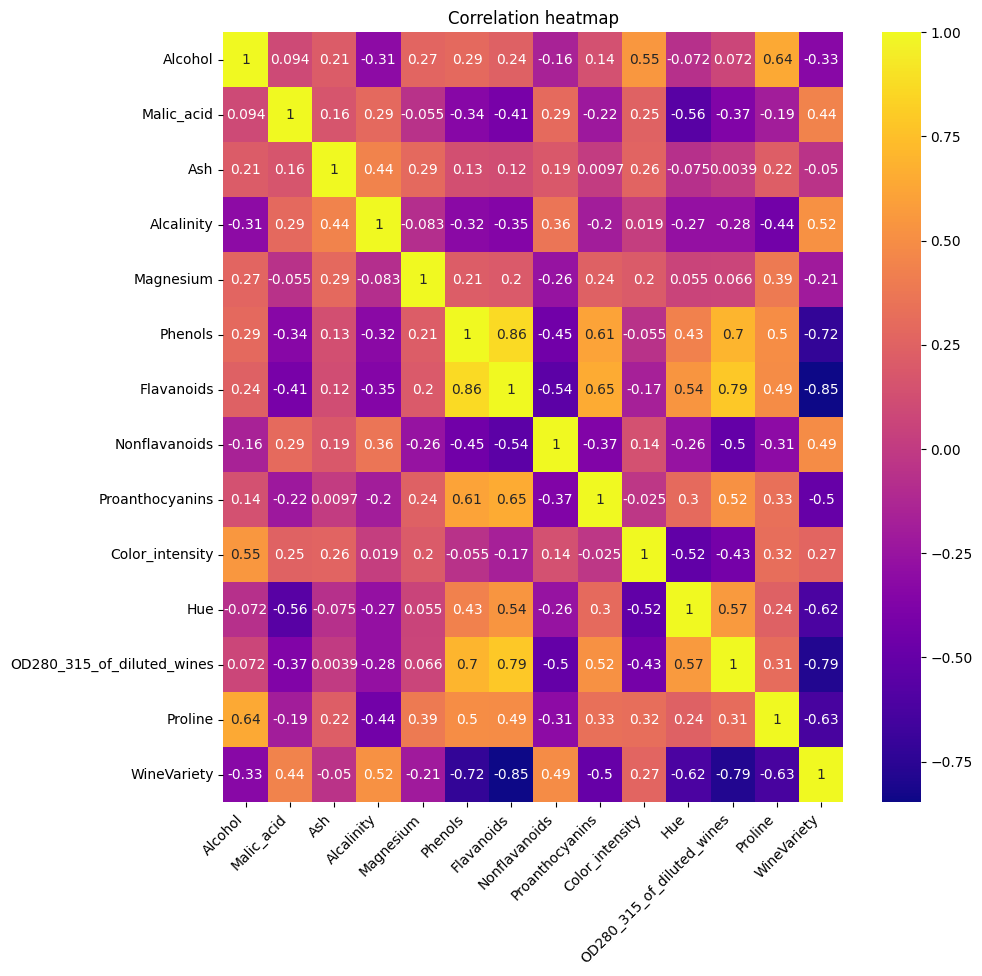

In [3]:

correlation_matrix = data.corr()

plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(correlation_matrix, annot = True, cmap = "plasma")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')

plt.title("Correlation heatmap")
plt.show()


## Frequency distribution of labels

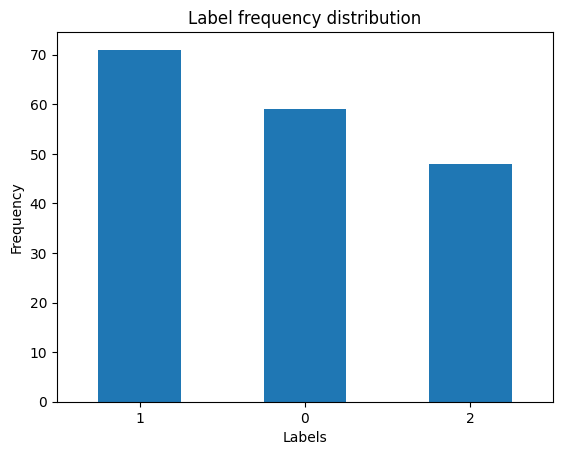

In [4]:

label_counts = data['WineVariety'].value_counts()
ax = label_counts.plot(kind='bar')
plt.xticks(rotation=0)

plt.title('Label frequency distribution')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()


Text(0.5, 1.0, 'Label distribution')

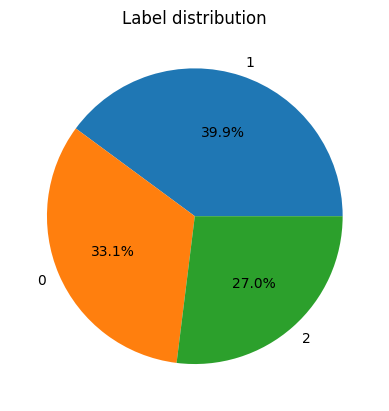

In [5]:
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',)
plt.title('Label distribution')

### Note that, the label with 39.9% dominates the dataset. Additionally, the labels are not evenly distributed. One of the reasons, which may impact the performance in this case is an unbalanced dataset.

## Logistic Regression model  
### Here, we monitor the "precision"  metric.

In [6]:
X, y = data[['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity',
       'Hue', 'OD280_315_of_diluted_wines', 'Proline']].values, data['WineVariety'].values  # X is a feature vector and y is the corresponding label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print ('Train Set: %d rows \n Test Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

reg = 0.1       # larger values indicating stronger regularization.
model = LogisticRegression(C = 1/reg, solver='lbfgs', 
              multi_class = 'auto', 
              max_iter=10000).fit(X_train, y_train)

wine_predict = model.predict(X_test)

print('Predicted labels: ', wine_predict[:25])
print('Actual labels   : ' ,y_test[:25])
print(classification_report(y_test, wine_predict))

Train Set: 124 rows 
 Test Set: 54 rows
Predicted labels:  [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 2 0 1 0 0 1 1]
Actual labels   :  [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        22
           2       0.93      1.00      0.96        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



## Use the model with new data observation

#### When we are happy with our model's predictive performance, we can save it and then use it to predict classes. In this case, we have tested for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [7]:
X1 = [13.72,1.43,2.5,16.7,108,3.4,3.67,0.199,2.04,6.8,0.89,2.87,1285]
X2 = [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]

Xnew = [X1, X2]
ynew = model.predict(Xnew)
ynew

array([0, 1])

## Random forest model

In [8]:
rfmodel = RandomForestClassifier()  
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],   #  number of trees in the forest 
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator = rfmodel, param_grid = param_grid, cv = 3)  # tuning 
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_


In [9]:
rfmodel_best = RandomForestClassifier(**best_params)

rfmodel_best.fit(X_train, y_train)
y_pred = rfmodel_best.predict(X_test)

# performance on the test set
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params, '\n')
print("F1 Score on Test Set:", f1, '\n')
print("Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 30} 

F1 Score on Test Set: 1.0 

Accuracy on Test Set: 1.0


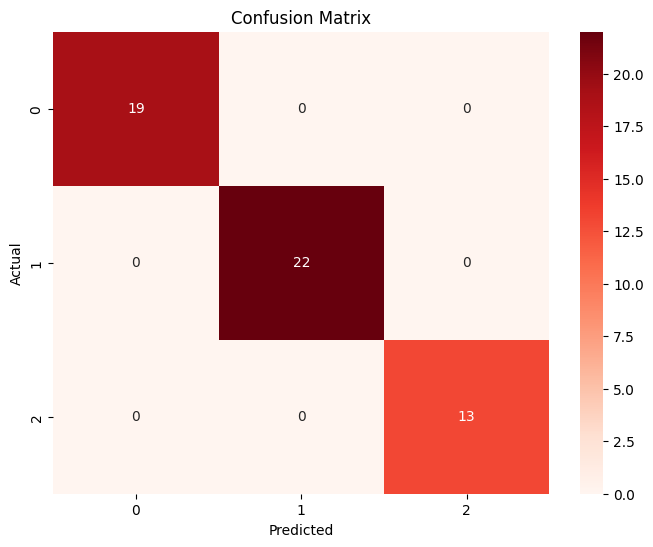

In [10]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## SVM model

In [11]:

param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm_classifier = SVC(kernel='linear')

cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)


Cross-Validation Scores: [0.92       0.96       0.96       1.         0.95833333]


Accuracy on Test set: 0.9629629629629629
Precision on Test set: 0.9642857142857143


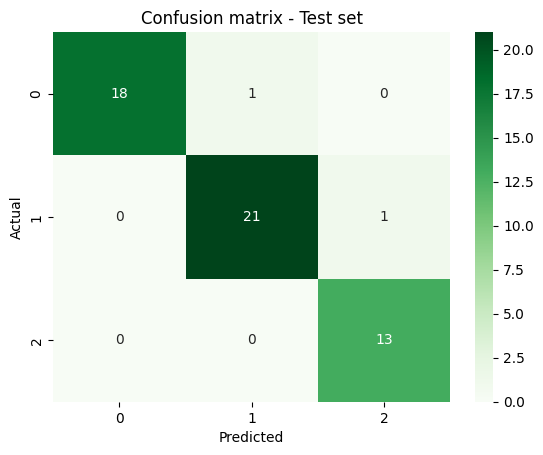

In [13]:
svm_classifier = SVC(**best_params)

svm_classifier.fit(X_train, y_train)

# predictions on the test set
y_pred_test = svm_classifier.predict(X_test)

# performance on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')

print("Accuracy on Test set:", accuracy_test)
print("Precision on Test set:", precision_test)

# confusion Matrix
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion matrix - Test set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## KNN

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [15]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

#  cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Fit the model on the entire training data
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)

#  accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Cross-Validation Scores: [0.96 0.96 0.88 0.96 1.  ]
Mean CV Accuracy: 0.952
Test Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Confusion Matrix:
[[19  0  0]
 [ 0 22  0]
 [ 0  0 13]]
